In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [152]:
df=pd.read_csv('train.csv')

In [153]:
df.shape

(404290, 6)

In [154]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [155]:
new_df=df.sample(30000,random_state=2)

In [156]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 398782 to 312470
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [157]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [158]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [159]:
# Unique questions
qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
np.unique(qid).shape[0]

55299

In [160]:
# NO of repeating questions
print(qid.shape[0],np.unique(qid).shape[0])
qid.shape[0]-np.unique(qid).shape[0]

60000 55299


4701

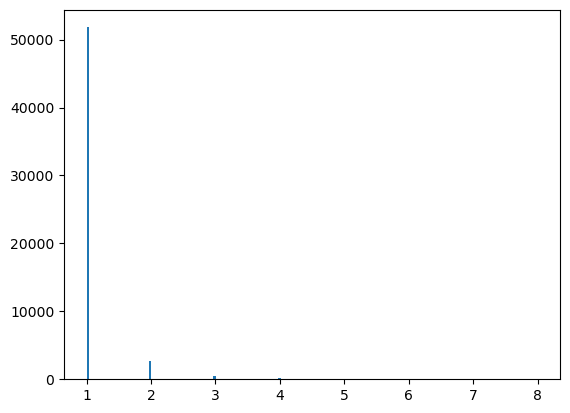

In [161]:
# Repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.show()

In [162]:
# Feature Engineering
# Len of question
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [163]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [164]:
# No of words
new_df['q1_num_words']=new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row: len(row.split(" ")))

In [165]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [166]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    return len(w1&w2)

In [167]:
new_df['word_common']=new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,10
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,20
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,11
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5


In [168]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    return len(w1)+len(w2)

In [169]:
new_df['total_words']=new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,12,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,10,20
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,20,40
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,11,22
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,5,10


In [170]:
new_df['word_share']=round(new_df['word_common']/new_df['total_words'],2)
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
192343,192343,291961,291962,Why was Hayden Christensen so awful in the Sta...,How did George Lucas make Star Wars Episode 4 ...,0,61,100,11,20,11,22,0.5
272094,272094,78416,21996,What are the safety precautions on handling sh...,What are the safety precautions on handling sh...,1,137,88,22,14,20,40,0.5
149235,149235,137653,235127,What are compound mixtures? What are examples ...,What are some examples of compounds?,0,54,36,9,6,7,14,0.5
323289,323289,254901,449236,Why is Amma so popular in Tamil Nadu?,Why is Amma such a huge phenomenon in Tamil Nadu?,1,37,49,8,10,8,16,0.5
272321,272321,125147,390559,How do I construct a resume without job experi...,How do you write a resume if you've never had ...,1,51,65,9,13,9,18,0.5


min char = 2
max char = 391
Avg char = 59.7133


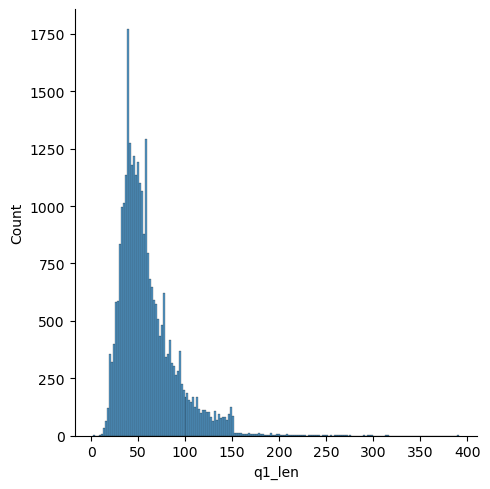

In [171]:
#Analysis of features
sns.displot(new_df['q1_len'])
print('min char =',new_df['q1_len'].min())
print('max char =',new_df['q1_len'].max())
print('Avg char =',new_df['q1_len'].mean())

min char = 6
max char = 1151
Avg char = 60.29343333333333


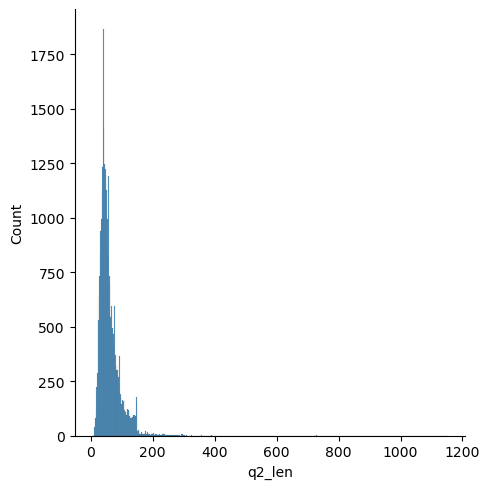

In [172]:
#Analysis of features
sns.displot(new_df['q2_len'])
print('min char =',new_df['q2_len'].min())
print('max char =',new_df['q2_len'].max())
print('Avg char =',new_df['q2_len'].mean())

min words 1
max words 72
avg words 10.969133333333334


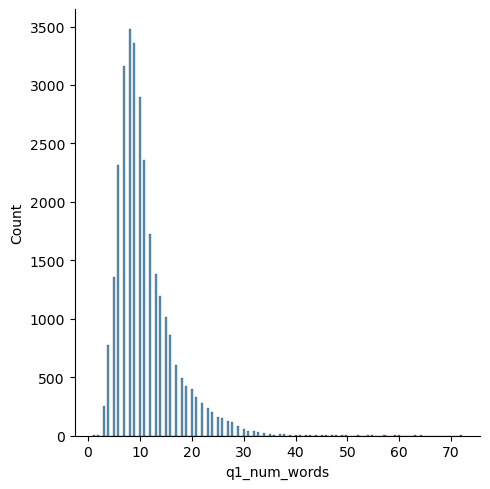

In [173]:
sns.displot(new_df['q1_num_words'])
print('min words',new_df['q1_num_words'].min())
print('max words',new_df['q1_num_words'].max())
print('avg words',new_df['q1_num_words'].mean())

min words 1
max words 237
avg words 11.232133333333334


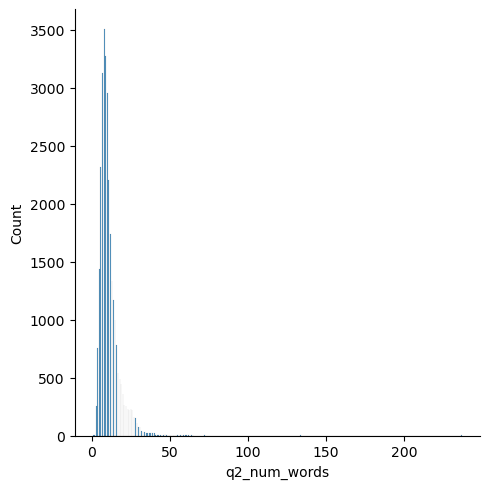

In [174]:
sns.displot(new_df['q2_num_words'])
print('min words',new_df['q2_num_words'].min())
print('max words',new_df['q2_num_words'].max())
print('avg words',new_df['q2_num_words'].mean())

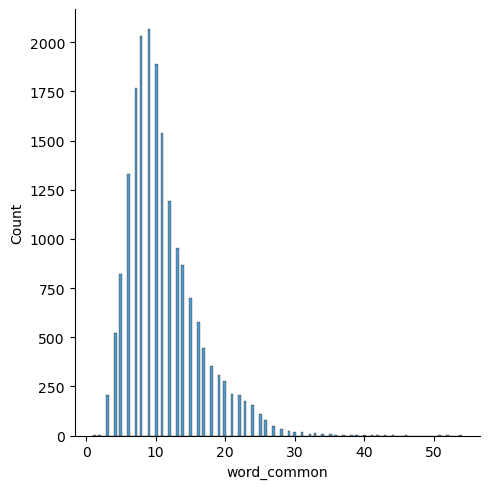

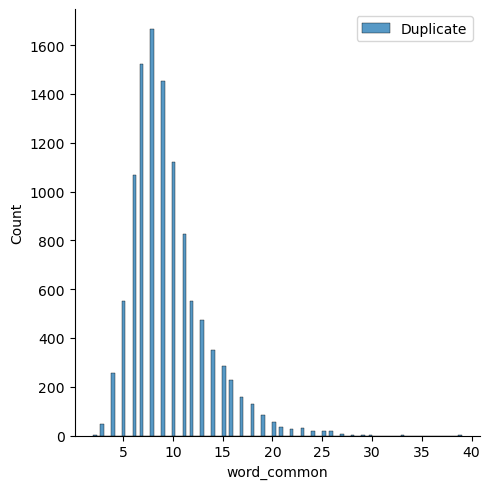

In [175]:
# Common Words
sns.displot(new_df[new_df['is_duplicate']==0]['word_common'],label='Non Duplicate')
sns.displot(new_df[new_df['is_duplicate']==1]['word_common'],label='Duplicate')
plt.legend()
plt.show()

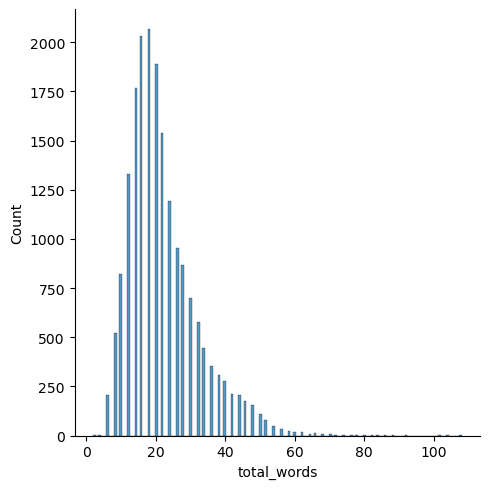

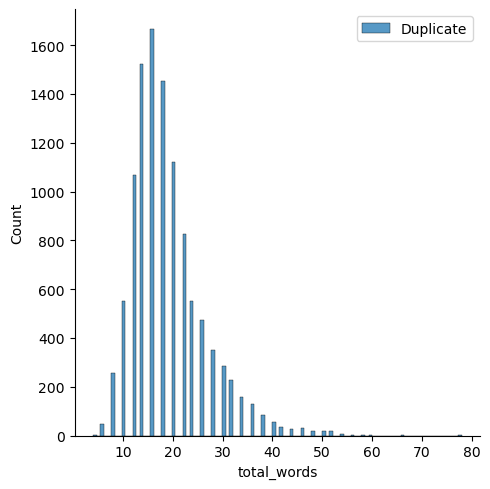

In [176]:
# total_words
sns.displot(new_df[new_df['is_duplicate']==0]['total_words'],label='Non Duplicate')
sns.displot(new_df[new_df['is_duplicate']==1]['total_words'],label='Duplicate')
plt.legend()
plt.show()


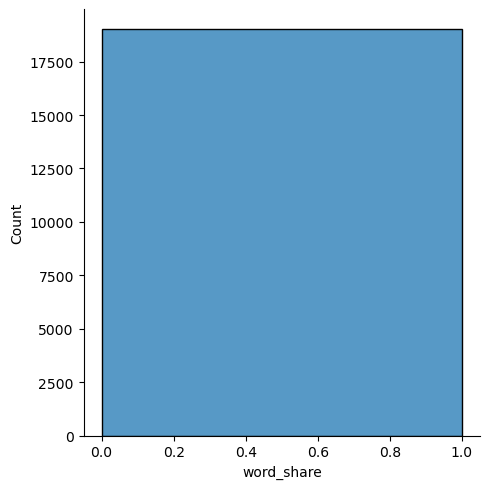

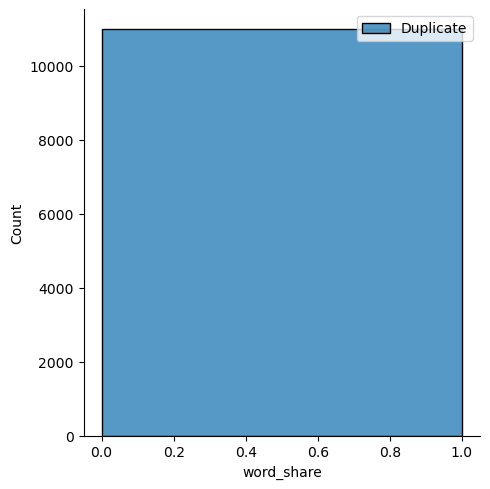

In [177]:
# word_share

sns.displot(new_df[new_df['is_duplicate']==0]['word_share'],label='Non Duplicate')
sns.displot(new_df[new_df['is_duplicate']==1]['word_share'],label='Duplicate')
plt.legend()
plt.show()


In [178]:
ques_df=new_df[['question1','question2']]
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
398782,1,76,77,12,12,12,24,0.5
115086,0,49,57,12,15,10,20,0.5
327711,0,105,120,25,17,20,40,0.5
367788,0,59,146,12,30,11,22,0.5
151235,0,35,50,5,9,5,10,0.5


In [179]:
from sklearn.feature_extraction.text import CountVectorizer
# Merge texts
questions=list(ques_df['question1'])+list(ques_df['question2'])
cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [180]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [181]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,12,24,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,10,20,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,20,40,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,11,22,0.5,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,5,10,0.5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=2)

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_trian,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.736

In [184]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_trian,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.7306666666666667